In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline

In [2]:
anes = pd.read_csv('data/anes_pilot_2020ets_csv.csv')

In [3]:
anes.head()

,V1,StartDate,EndDate,_v1,RecordedDate,ResponseId,qmetadata_Browser,qmetadata_Version,_v2,qmetadata_Resolution,...,rr_scale,white,black,namer,asian,hpi,mixed,race7,vidx,vidknow
0,1451,4/12/2020 17:04,4/12/2020 17:23,1131,4/12/2020 17:23,R_3oBJppI62KNh4MC,Chrome,81.0.4044.96,Android 9,360x760,...,9,1,0,0,0,0,0,1,2.0,1
1,2875,4/16/2020 10:14,4/16/2020 11:06,3170,4/16/2020 11:06,R_1jdLlxoKBpgExZS,Firefox,52,Windows NT 5.1,1024x768,...,16,1,0,0,0,0,0,1,3.0,0
2,859,4/17/2020 21:34,4/17/2020 22:32,3490,4/17/2020 22:32,R_ClTXw6WOcfMOLWp,Chrome,81.0.4044.111,Android 9,360x760,...,6,0,0,0,0,0,0,5,3.0,0
3,2031,4/16/2020 17:29,4/16/2020 18:34,3885,4/16/2020 18:34,R_3sjr4zeG5BbBJa0,Chrome,78.0.3904.96,Android 7.1.1,320x570,...,13,1,0,0,0,0,0,1,3.0,1
4,587,4/16/2020 15:20,4/16/2020 15:59,2330,4/16/2020 15:59,R_21H8jh0vE4GUqI5,Chrome,80.0.3987.132,Windows NT 10.0,1920x1080,...,4,0,1,0,0,0,0,2,2.0,0


In [4]:
anes.shape

(3080, 470)

In [5]:
anes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Columns: 470 entries, V1 to vidknow
dtypes: float64(3), int64(453), object(14)
memory usage: 11.0+ MB


In [6]:
anes.describe()

,V1,_v1,follow,reg1,votemail1a,votemail1b,votecount,votemail2,voterid1,voterid2,...,rr_scale,white,black,namer,asian,hpi,mixed,race7,vidx,vidknow
count,3080.00000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,...,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3078.000000,3080.000000
mean,1540.50000,3798.924026,1.644156,1.290584,46.673377,39.099351,3.329221,2.751948,1.547727,3.457468,...,8.692857,0.701623,0.106169,0.005195,0.036364,0.001948,0.034091,1.785714,1.816439,0.407792
std,889.26374,10553.322567,0.876972,0.724222,42.500686,36.917557,1.093571,1.310572,0.776603,2.807707,...,5.998361,0.457620,0.308104,0.071899,0.187224,0.044101,0.282326,1.430945,1.272351,0.491504
min,1.00000,464.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,770.75000,1643.750000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1540.50000,2233.500000,1.000000,1.000000,88.000000,7.000000,3.000000,3.000000,1.000000,2.000000,...,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,2310.25000,3211.250000,2.000000,1.000000,88.000000,77.000000,4.000000,4.000000,2.000000,7.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000
max,3080.00000,255418.000000,9.000000,4.000000,88.000000,77.000000,9.000000,9.000000,9.000000,9.000000,...,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,3.000000,1.000000


# Dropping Columns 

In [7]:
#make a copy of the dataframe 
data = anes.copy(deep = True)

In [8]:
#look at all the column names
for col in data.columns:
    print(col)

V1
StartDate
EndDate
_v1
RecordedDate
ResponseId
qmetadata_Browser
qmetadata_Version
_v2
qmetadata_Resolution
follow
reg1
votemail1a
votemail1b
votecount
votemail2
voterid1
voterid2
turnout16a
turnout16a1
turnout16b
vote16
hopeful
afraid
outraged
angry
happy
worried
proud
irritated
nervous
meeting
moneyorg
protest
online
persuade
button
moneycand
argument
particip_none
talk1
talk2
talk3
fttrump1
ftobama1
ftbiden1
ftwarren1
ftsanders1
ftbuttigieg1
ftharris1
ftklobuchar1
ftpence1
ftyang1
ftpelosi1
ftrubio1
ftocasioc1
fthaley1
ftthomas1
ftfauci1
ftblack
ftwhite
fthisp
ftasian
ftillegal
ftfeminists
ftmetoo
fttransppl
ftsocialists
ftcapitalists
ftbigbusiness
ftlaborunions
ftrepublicanparty
ftdemocraticparty
primaryvote
vote20jb
vote20bs
cvote2020
apppres7
frnpres7
immpres7
econpres7
covidpres7
healthcarepres7
check
dtleader1
dtleader2
dtcares
dtdignif
dthonest
dtauth
dtdiv
dtknow
jbleader1
jbleader2
jbcares
jbdignif
jbhonest
jbauth
jbdiv
jbknow
bsleader1
bsleader2
bscares
bsdignif
bshonest


# Addressing Null Values

In [9]:
check_for_nan = data.isnull()
print (check_for_nan)

         V1  StartDate  EndDate    _v1  RecordedDate  ResponseId  \
0     False      False    False  False         False       False   
1     False      False    False  False         False       False   
2     False      False    False  False         False       False   
3     False      False    False  False         False       False   
4     False      False    False  False         False       False   
...     ...        ...      ...    ...           ...         ...   
3075  False      False    False  False         False       False   
3076  False      False    False  False         False       False   
3077  False      False    False  False         False       False   
3078  False      False    False  False         False       False   
3079  False      False    False  False         False       False   

      qmetadata_Browser  qmetadata_Version    _v2  qmetadata_Resolution  ...  \
0                 False              False  False                 False  ...   
1                 False

In [10]:
data.isnull().values.any()

True

In [11]:
#these are the amount of nulls
data.isna().sum().sum()

3216

In [12]:
#this is where i have null values greater than 100
data.columns[data.isnull().sum()>100]

#mauga, pk_cjus, pk_germ are questions that ask respondents to identify who is in foreign political offices, and relig_11-TEXT is a text box where respondentss can put in their religiouss ID iif it was not listed
#these columns are not pertinent to my analysis bc i already have a religion ID column and we are focusesd on domestic not international knowledeg
# i am going to drop these columns 

Index(['relig1_11_TEXT', 'mauga', 'pk_cjus', 'pk_germ'], dtype='object')

In [13]:
data['expshark'].value_counts()

2    2827
1     243
9      10
Name: expshark, dtype: int64

In [14]:
data.drop(inplace=True, columns=[ 'V1', 'StartDate', 'EndDate', '_v1', 'RecordedDate', 
                                 'ResponseId','qmetadata_Browser', 'qmetadata_Version', '_v2', 
                                 'qmetadata_Resolution', 'check','relig1_11_TEXT', 'mauga', 'pk_cjus', 
                                 'pk_germ', 'ethnic1', 'ethnic2', 'ethnic3', 'mixed', 'hpi', 'asian', 'namer',
                                'black', 'white', 'race1_hpi', 'race1_asian', 'race1_namer', 'race1_black', 'race1_white',
                                'hispanicr', 'nonhispanic_white', 'hispanic_white', 'hispanic', 'pid2r', 'pk_index',
                                'survexp1', 'survexp2', 'dejavu', 'surv_comp', 'RAND_INC', 'XCONTACT', 'XFORGIVE', 'FEEDBACK_GROUP',
                                'INSTRUCTION_GROUP', 'form', 'serious', 'admit', 'geer1896', 'pk_sen', 'pk_spend', 'expshark', 'inc_anes'])


# make sure to drop race variiables --> pg 59 to  72
# drop inc_anes, inc_cps, inc_cpsmoddd, exp_shark

# make sure to convert birthry 
# drop marital2

# drop the citizen stuff 
# drop geer
# drop admit 
# drop PK pg 100 --> 101
# drop whites_1 --> whites_7 and samee for blacks, hisp, asians, survexp1 & 2, dejavu
# basicallly 98 on 
# drop age if you have birthyr 
# drop pg 114 until 117 


#USE PID 7 AS DEMO FOR PID
#race7 as demo 



What columns I am dropping and why:
1. qmetadata_Broweser, qmetadata_Verrsion, _v2, qmetadata_Resolution, 
    these columns contains information about what browers repondents utlizied when taking the survey. For the purposes of my analysis, this information is not relevant. 
  
2. StartDate, EndDate and RecordedDate 
    these columns contain information about when the survey was conducted. Not needed 
 
3. 
    V1, _v1
        no information about these 

4. ResponseID
    unique ID for each respondent 
 
 5. 'check' column was a question that asked repondents to select a certaina nswer so the surveyors could ensure the respondent's device was working




In [15]:
#looks like we still have some null values
data.isnull().values.any()

True

In [16]:
#looks like there are only 8 rows with null values, let's go ahead and drop them since missing 8 rows from 3k rows is not a huge differrence 
data.isna().sum().sum()

2

In [17]:
data.dropna(inplace=True)


In [18]:
data.shape

(3078, 418)

In [19]:
#no more null values! 
data.isnull().values.any()

False

# Imputing 
- bc of the nature of surrveys, some respondents dont get asked certain questions --> NA 
- and a lot of missing over all 

cant just drop things, will have to imput the median 

# make 9 for missing NA

In [20]:
data['vote20jb'].replace(9, np.nan, inplace=True)

# make  88 for NA --> NA

# make 77 for NA --> NA

# make 8 for missing NA

# make 7 for NA --> NA

# make 99 for missing NA

In [21]:
# creating a dataframe of just demographic variables 

demographic = data[['age', 'home_ownership', 'income', 'lcself', 'race7', 'citizen1', 'citizen2', 'marital1', 'marital2', 'state', 'children', 'educ', 'sex', 'birthyr']]

# Exploring Distributions

In [22]:
data['mis_covid1'].value_counts(normalize=True)


2    0.556205
1    0.442495
9    0.001300
Name: mis_covid1, dtype: float64

In [23]:
#dropping the 2 non-responses
data.drop(data[data['mis_covid1'] == 9].index, inplace=True)

In [24]:
data['mis_covid1'].value_counts(normalize=True)

2    0.556929
1    0.443071
Name: mis_covid1, dtype: float64

In [25]:
data['conf_covid1'].value_counts(normalize=True)

3    0.324333
4    0.240078
5    0.221535
2    0.153221
1    0.060507
9    0.000325
Name: conf_covid1, dtype: float64

In [26]:
data['mis_covid2'].value_counts(normalize=True)

2    0.795055
1    0.204294
9    0.000651
Name: mis_covid2, dtype: float64

In [27]:

data.drop(data[data['mis_covid2'] == 9].index, inplace=True)

In [28]:
data['mis_covid2'].value_counts(normalize=True)

2    0.795573
1    0.204427
Name: mis_covid2, dtype: float64

In [29]:
data['conf_covid2'].value_counts(normalize=True)

5    0.378906
4    0.241536
3    0.236003
2    0.099935
1    0.042643
9    0.000977
Name: conf_covid2, dtype: float64

In [30]:
data['viol3_dems'].value_counts(normalize=True)

6    0.612956
4    0.096680
2    0.084635
5    0.081380
1    0.067708
3    0.056315
9    0.000326
Name: viol3_dems, dtype: float64

In [31]:
data.drop(data[data['viol3_dems'] == 6].index, inplace=True)

In [32]:
data['viol3_dems'].value_counts()

4    297
2    260
5    250
1    208
3    173
9      1
Name: viol3_dems, dtype: int64

In [33]:
data['viol3_reps'].value_counts(normalize=True)

6    1.0
Name: viol3_reps, dtype: float64

In [34]:
anes['viol3_reps'].value_counts(normalize=True)

6    0.523701
2    0.110714
4    0.110065
3    0.094805
1    0.081169
5    0.079221
9    0.000325
Name: viol3_reps, dtype: float64

In [35]:
data.drop(data[data['viol3_reps'] == 6].index, inplace=True)

In [36]:
data['viol3_reps'].value_counts(normalize=True)

Series([], Name: viol3_reps, dtype: float64)

In [37]:
data['viol3_both'].value_counts(normalize=True)

Series([], Name: viol3_both, dtype: float64)

In [38]:
data['facebook1'].value_counts()

Series([], Name: facebook1, dtype: int64)

In [39]:
data.drop(data[data['facebook1'] == 66].index, inplace=True)

In [40]:
data['facebook1'].value_counts(normalize=True)

Series([], Name: facebook1, dtype: float64)

In [41]:
#need to drop 66
data['twitter1'].value_counts(normalize=True)

Series([], Name: twitter1, dtype: float64)

In [42]:
data.drop(data[data['twitter1'] == 66].index, inplace=True)

In [43]:
data.shape

(0, 418)

# Creating a Target Variable 
four questions: mis_covid1, conf_covid1, mis_covid2 and conf_covid2 all capture if a respondent is misinformed about covid_19 and how confident they are about that. I create a single variable misinformation score variable that captures that. 

In [44]:
'''
what i want to do is create a variable called  covid_mis_score where... 

covid_mis_score --> higher score meanss they are more misinformed, lower score means they are less misinformed 

right now, with no recoding, a low score on covid_lab means misinformed 


right now, with no recoding, a low score on covid_vax means INFORMED 


SO i need to flip covid_lab so that a 1 means INFORMED and a 2 means INFORMED 




'''







'\nwhat i want to do is create a variable called  covid_mis_score where... \n\ncovid_mis_score --> higher score meanss they are more misinformed, lower score means they are less misinformed \n\nright now, with no recoding, a low score on covid_lab means misinformed \n\n\nright now, with no recoding, a low score on covid_vax means INFORMED \n\n\nSO i need to flip covid_lab so that a 1 means INFORMED and a 2 means INFORMED \n\n\n\n\n'

In [45]:
#renaming column to be more reflective 
data.rename(columns={"mis_covid1": 'covid_lab'}, inplace = True)



In [46]:
#checking to see renaming worked 
data['covid_lab'].value_counts()

Series([], Name: covid_lab, dtype: int64)

In [47]:
#renaming column to be more reflective 
data.rename(columns={"mis_covid2": 'covid_vax'}, inplace = True)

In [48]:
#checking to see renaming worked 
data['covid_vax'].value_counts()

Series([], Name: covid_vax, dtype: int64)

In [49]:
#checking data has changed
data.head()

,follow,reg1,votemail1a,votemail1b,votecount,votemail2,voterid1,voterid2,turnout16a,turnout16a1,...,pidstr2_dr,pidstr2_ind,pidstr3_dr,pidstr3_ind,pid7,pid7str,rr_scale,race7,vidx,vidknow


In [50]:
#changing the values so that a misinformed response is a 1 and an informed response is a 0 
data.covid_lab.replace((2,1), (0,1), inplace=True)


Series([], Name: covid_lab, dtype: int64)

In [51]:
data['covid_lab'].value_counts()

Series([], Name: covid_lab, dtype: int64)

In [52]:
#changing the values so that a misinformed response is a 1 and an informed response is a 0 
data.covid_vax.replace((2,1), (0,1), inplace=True)
    
    

Series([], Name: covid_vax, dtype: int64)

In [53]:
data['covid_vax'].value_counts()

Series([], Name: covid_vax, dtype: int64)

In [54]:
#creating a new column - my target variable : a covid misinformation score that combines the two scores from above 
data['covid_mis_score'] = data['covid_lab'] + data['covid_vax']

In [55]:
# looking at the distribution of scores 
data['covid_mis_score'].value_counts()

Series([], Name: covid_mis_score, dtype: int64)

# EDA VIZ

In [56]:
# looking at correlations 
#plt.figure(figsize=(20,25))
#sns.heatmap(data.corr().abs(), annot=True)
#plt.show()

In [57]:
# plotting the relationship between violencee towards demcrats and covid miss score 
plt.figure(figsize=(10,7))
sns.countplot(data=data, x=data['viol3_dems'], hue='covid_mis_score')





ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 720x504 with 0 Axes>

In [58]:
# plotting the relationship between violencee towards reps and covid miss score 
plt.figure(figsize=(10,7))
sns.countplot(data=data, x=data['facebook1'], hue='covid_mis_score')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

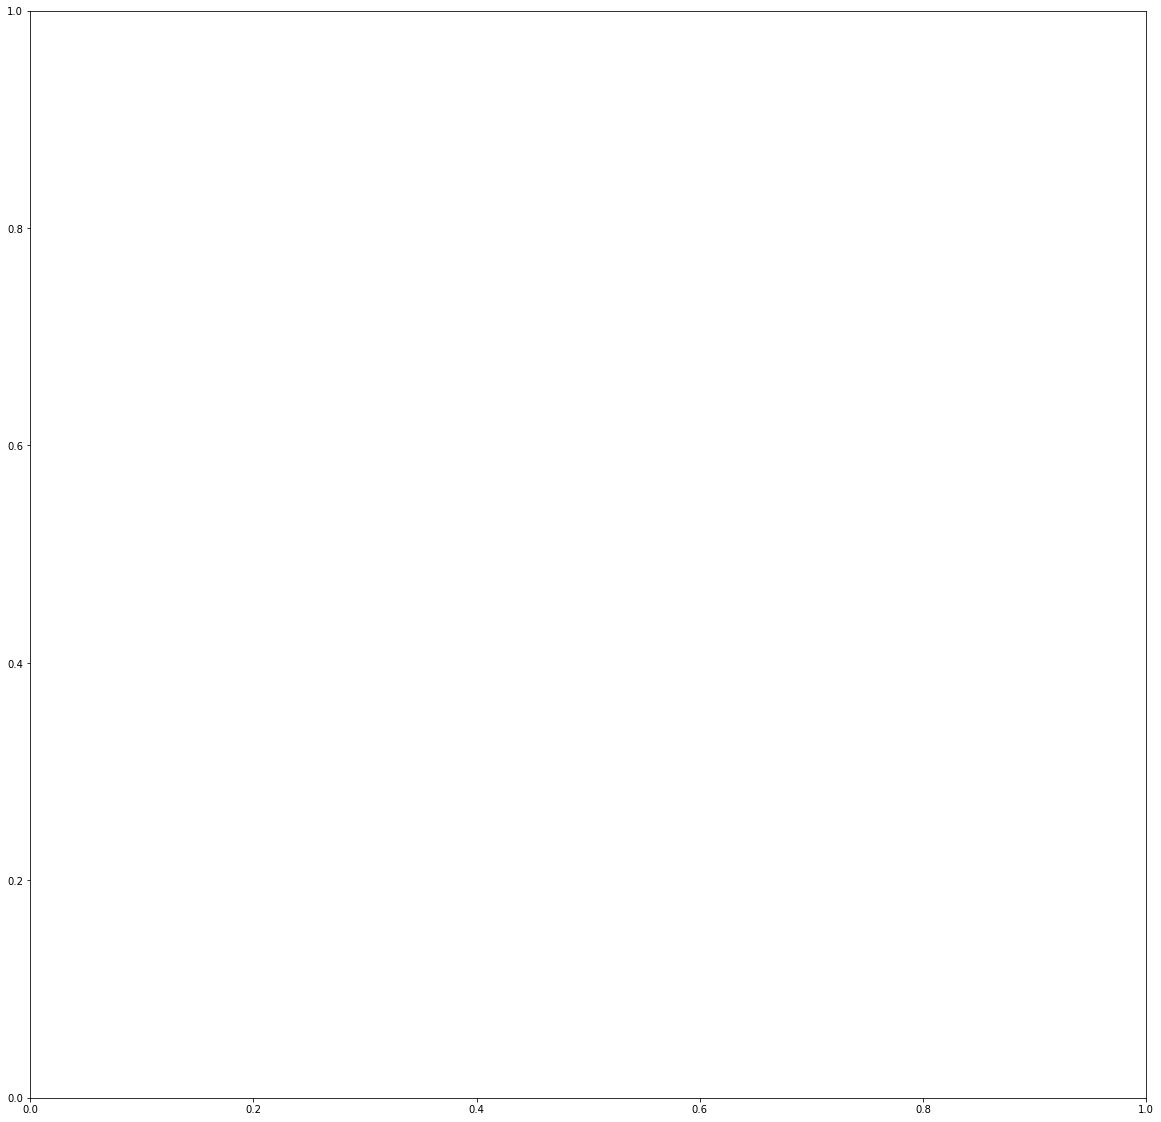

In [59]:
#plotting relationships between fauci FT and covidmis
plt.figure(figsize=(20,20))
sns.lineplot(data=data, y=data['ftfauci1'], x=data['covid_mis_score'])




In [ ]:
#plotting relationships between blackFT and covidmis
plt.figure(figsize=(20,20))
sns.lineplot(data=data, y=data['ftblack'], x=data['covid_mis_score'])

In [ ]:
#plotting relationships between blackFT and covidmis
plt.figure(figsize=(20,20))
sns.countplot(data=data, x=data['ftblack'], hue=data['covid_mis_score'])

In [ ]:
#plotting relationships between asianFT and covidmis
plt.figure(figsize=(20,20))
sns.lineplot(data=data, y=data['ftasian'], x=data['covid_mis_score'])

In [ ]:
#plotting relationships between democratFT and covidmis
plt.figure(figsize=(20,20))
sns.lineplot(data=data, y=data['ftdemocraticparty'], x=data['covid_mis_score'])

In [ ]:
#plotting relationships between repFT and covidmis
plt.figure(figsize=(20,20))
sns.lineplot(data=data, y=data['ftrepublicanparty'], x=data['covid_mis_score'])

In [ ]:
#covid lab and dems
plt.figure(figsize=(20,20))
sns.lineplot(data=data, y=data['ftdemocraticparty'], x=data['covid_lab'])

In [ ]:
#covid vax and dems
plt.figure(figsize=(20,20))
sns.lineplot(data=data, y=data['ftdemocraticparty'], x=data['covid_vax'])

# PCA

In [ ]:
data.drop(inplace=True, columns=['ethnic1', 'ethnic2', 'ethnic3'])


In [ ]:
# select 

X = data.values
y = data['covid_mis_score'].values



In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features
X = StandardScaler().fit_transform(X)

# Preview X
pd.DataFrame(data=X, columns=features).head()

# EDA

In [ ]:



features16 = data[['whitejob', 'votemail2', 'viol1', 'taxecon', 'talk2', 'return', 'lcself', 'impact8', 'immpres7', 'fundmt1', 'ftpence1', 'experts', 'econnow', 'conf_covid2', 'abort_imp', 'abort1', 'covid_mis_score']]